In [50]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Loading data
irisData = load_iris()

# Create feature and target arrays
X = irisData.data
y = irisData.target


In [51]:

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
			X, y, test_size = 0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

# Predict on dataset which model has not seen before
print(knn.predict(X_test))


[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('C:\\Users\\dell\\anaconda3\\notebooks\\data\\data.csv')
data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [5]:
data['diagnosis'].replace({"M": "1", "B": "0"}, inplace =True)
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         1        17.99         10.38          122.80     1001.0   
1    842517         1        20.57         17.77          132.90     1326.0   
2  84300903         1        19.69         21.25          130.00     1203.0   
3  84348301         1        11.42         20.38           77.58      386.1   
4  84358402         1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

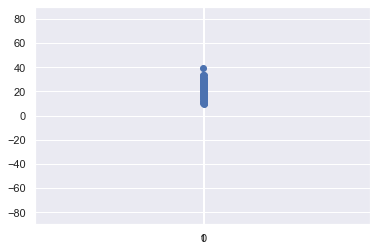

In [6]:
plt.scatter(data['diagnosis'],data['texture_mean'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [7]:
x = data.iloc[:,1:3] # 1t for rows and second for columns
x

diagnosis  radius_mean
0           1        17.99
1           1        20.57
2           1        19.69
3           1        11.42
4           1        20.29
..        ...          ...
564         1        21.56
565         1        20.13
566         1        16.60
567         1        20.60
568         0         7.76

[569 rows x 2 columns]

In [8]:
kmeans1 = KMeans(3)
kmeans1.fit(x)

KMeans(n_clusters=3)

In [9]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['diagnosis'],data_with_clusters['radius_mean'], c=data_with_clusters['Clusters'],cmap='rainbow')

NameError: name 'identified_clusters' is not defined

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:

 df = pd.read_csv("C:\\Users\\ENG.Belal778095893\\Downloads\\Salary_data.csv", delimiter=",", encoding='utf-8');
df

YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0

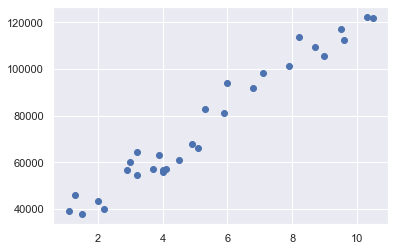

In [78]:
plt.scatter(df[ 'YearsExperience'],df['Salary'])

In [81]:
from sklearn.cluster import KMeans

km = KMeans (n_clusters=4)

km


KMeans(n_clusters=4)

In [83]:
 y_pred= km.fit_predict(df[[ 'YearsExperience', 'Salary']])
y_pred

array([1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0])

In [84]:

df['Cluster']=y_pred 
df


YearsExperience    Salary  Cluster
0               1.1   39343.0        1
1               1.3   46205.0        1
2               1.5   37731.0        1
3               2.0   43525.0        1
4               2.2   39891.0        1
5               2.9   56642.0        3
6               3.0   60150.0        3
7               3.2   54445.0        3
8               3.2   64445.0        3
9               3.7   57189.0        3
10              3.9   63218.0        3
11              4.0   55794.0        3
12              4.0   56957.0        3
13              4.1   57081.0        3
14              4.5   61111.0        3
15              4.9   67938.0        3
16              5.1   66029.0        3
17              5.3   83088.0        2
18              5.9   81363.0        2
19              6.0   93940.0        2
20              6.8   91738.0        2
21              7.1   98273.0        2
22              7.9  101302.0        2
23              8.2  113812.0        0
24              8.7  109431.0        0
25              9.0  105582.0        0
26              9.5  116969.0        0
27              9.6  112635.0        0
28             10.3  122391.0        0
29             10.5  121872.0        0

In [99]:
km.cluster_centers_

array([[9.40000000e+00, 1.14670286e+05],
       [1.62000000e+00, 4.13390000e+04],
       [6.50000000e+00, 9.16173333e+04],
       [3.87500000e+00, 6.00832500e+04]])

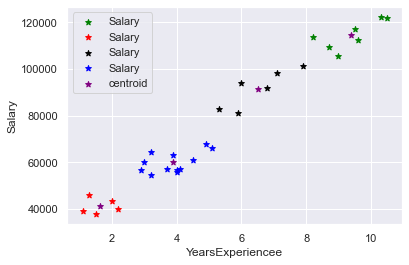

In [103]:
df1=df[df.Cluster==0]
df2=df[df.Cluster==1]
df3=df[df.Cluster==2]
df4=df[df.Cluster==3]
plt.scatter(df1.YearsExperience, df1['Salary'], color='green', marker='*', label='Salary')
plt.scatter(df2.YearsExperience, df2[ 'Salary'], color='red', marker='*', label='Salary')
plt.scatter(df3.YearsExperience, df3[ 'Salary'], color='black', marker='*', label='Salary')
plt.scatter(df4.YearsExperience, df4['Salary'], color='blue', marker='*', label='Salary')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple', marker='*', label='centroid')
plt.xlabel('YearsExperiencee')
plt.ylabel('Salary')
plt.legend()

In [104]:
df1

YearsExperience    Salary  Cluster
23              8.2  113812.0        0
24              8.7  109431.0        0
25              9.0  105582.0        0
26              9.5  116969.0        0
27              9.6  112635.0        0
28             10.3  122391.0        0
29             10.5  121872.0        0

In [105]:
df2

YearsExperience   Salary  Cluster
0              1.1  39343.0        1
1              1.3  46205.0        1
2              1.5  37731.0        1
3              2.0  43525.0        1
4              2.2  39891.0        1

In [106]:
df3

YearsExperience    Salary  Cluster
17              5.3   83088.0        2
18              5.9   81363.0        2
19              6.0   93940.0        2
20              6.8   91738.0        2
21              7.1   98273.0        2
22              7.9  101302.0        2

In [107]:
df4

YearsExperience   Salary  Cluster
5               2.9  56642.0        3
6               3.0  60150.0        3
7               3.2  54445.0        3
8               3.2  64445.0        3
9               3.7  57189.0        3
10              3.9  63218.0        3
11              4.0  55794.0        3
12              4.0  56957.0        3
13              4.1  57081.0        3
14              4.5  61111.0        3
15              4.9  67938.0        3
16              5.1  66029.0        3

In [ ]:
 identified_clusters = kmeans1.fit_predict(x)
identified_clusters